<a href="https://colab.research.google.com/github/jorgemunozl/summerSchool_OperatorLearning_UNT/blob/master/LS_A_simple_preschool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We want to perform a LS fit in the given data, i.e., we look for $\mathbf{x}$ such that

$\mathbf{x}_{LS}=\textrm{arg}_{\mathbf{x} \in \mathbb{R}^{n}}  \min{\| \mathbf{A} \; \mathbf{x} - \mathbf{b}\|}_2^2 \qquad \left( 1 \right)$

We can solve $\left( 1 \right)$ analytically (see https://pillowlab.princeton.edu/teaching/statneuro2018/slides/notes03b_LeastSquaresRegression.pdf).

The solution is

$\mathbf{x}_{LS} = \left(\mathbf{A}^T \mathbf{A} \right)^{-1} \mathbf{A}^T \mathbf{b} \qquad \left( 2 \right)$.

💻 <font color='blue'> **Computing this in Python:**</font>

1) Just solve $\left( 2 \right)$ directly.

2) Just use a Python package (e.g. https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html). What does it do internally?

3) Perform the Singular Value Decomposition of $\mathbf{A} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T \qquad \left(3\right)$ (https://pillowlab.princeton.edu/teaching/statneuro2018/slides/notes02_SVD.pdf).

4) Compute the QR decomposition of $\mathbf{A}$.


<font color='blue'> **First we will create the data:**</font>



In [6]:
#%% Least-squares solution
#With built-in least-squares function
import numpy as np
import matplotlib.pyplot as plt

# Define example data if not already defined
np.random.seed(42)
x = np.linspace(0, 10, 20)
true_coef = np.array([2.5, 1.2])
A = np.vstack([x, np.ones(len(x))]).T
y_linear = A @ true_coef + np.random.normal(size=len(x))

We want to fit a linear equation to our data, i.e., we want to find a function $f(x)=c_1 \; x + c_2$ that approximates our data $(x, y_{linear})$.

<font color='blue'> **Try to form and solve the normal equations, i.e., task 1).**</font>

In [11]:
#With normal equations
A =  np.vstack([x, np.ones(len(x))]).T
# print(A)
coef_normal =  np.linalg.inv(A.T @ A ) @ A.T @ y_linear
print(coef_normal)

[2.31082696 1.97456663]


<font color='blue'> **Now, lets take the SVD of the data matrix and compute the LS solution based on that, i.e., task 3):**</font>
Check https://numpy.org/devdocs/reference/generated/numpy.linalg.svd.html for the exact function.

In [40]:
U, S, VT =  np.linalg.svd(A, full_matrices=False)
# Compute the LS solution based on the SVD
coef_svd =  VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ y_linear

<font color='blue'> **Now, print the two solutions and check how they compare:**</font>

In [41]:
print("Normal equations:         ", coef_normal)
print("SVD pseudo-inv solution:  ", coef_svd)

Normal equations:          [2.31082696 1.97456663]
SVD pseudo-inv solution:   [2.31082696 1.97456663]


In [42]:
S

array([26.43746171,  2.29589733])

<font color='blue'> **Compute the LS fit for either solution method**</font>

In [43]:
y_normal_eqs =  coef_normal[0] * x + coef_normal[1]
y_svd =  coef_svd[0] * x + coef_svd[1]

<font color='blue'> **Plot the results for both methods:**</font>

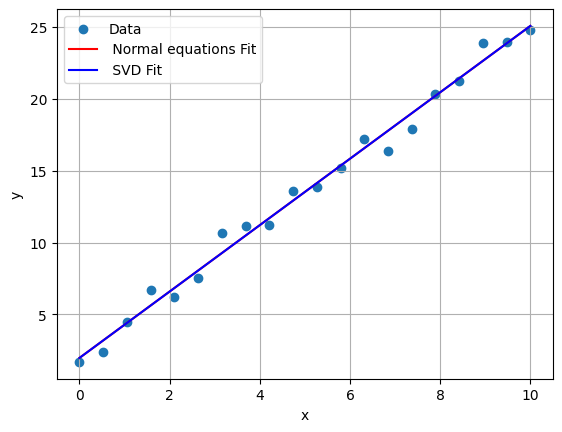

In [46]:
plt.figure()
plt.scatter(x, y_linear, label='Data')
plt.plot( x, y_normal_eqs , color='red', label=' Normal equations Fit')
plt.plot( x, y_svd , color='blue', label=' SVD Fit')
plt.xlabel("x"); plt.ylabel("y"); plt.grid(True)
plt.legend()
plt.show()